<a href="https://colab.research.google.com/github/Dr-Isam-ALJAWARNEH/ds-project-gmms-for-airq/blob/Notebook/GMMsforAirQ_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler

### Data

In [58]:
Data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_AQ.csv')
GeoJsonFile = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')

In [59]:
Data.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,1631277304,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,1631277308,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420
2,NYCP2_CS01A,1631277313,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,0,0,0,23.7,57.8,5.154881
3,NYCP2_CS01A,1631277318,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,0,0,0,23.6,57.6,4.508813
4,NYCP2_CS01A,1631277323,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,0,0,0,23.6,57.5,5.539503


#### Converting Unix time to DateTime

In [60]:
Data['time'] = Data['time'].apply(datetime.datetime.fromtimestamp)

In [61]:
Data.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm25
0,NYCP2_CS01A,2021-09-10 12:35:04,40.847672,-73.869316,11,1,1,0,0,0,...,0,0,0,0,0,0,0,23.7,57.3,4.508813
1,NYCP2_CS01A,2021-09-10 12:35:08,40.847668,-73.869316,22,4,1,0,0,2,...,0,0,0,0,0,0,0,23.7,57.8,5.462420
2,NYCP2_CS01A,2021-09-10 12:35:13,40.847649,-73.869362,40,1,1,0,0,1,...,0,0,0,0,0,0,0,23.7,57.8,5.154881
3,NYCP2_CS01A,2021-09-10 12:35:18,40.847649,-73.869362,26,1,0,0,0,0,...,0,0,0,0,0,0,0,23.6,57.6,4.508813
4,NYCP2_CS01A,2021-09-10 12:35:23,40.847649,-73.869362,44,4,0,1,0,0,...,0,0,0,0,0,0,0,23.6,57.5,5.539503


#### Missing values

In [ ]:
Data.isnull().sum()

In [63]:
Data.fillna({'bin12':Data['bin12'].mode()[0], 'bin13':Data['bin13'].mode()[0],'bin14':Data['bin14'].mode()[0],'bin19':Data['bin19'].mode()[0],'bin20':Data['bin20'].mode()[0],
             'bin21':Data['bin21'].mode()[0]}, inplace=True)

In [ ]:
Data.isnull().sum()

In [64]:
len(Data)

169999

In [ ]:
Data.describe()

#### Normalizing

In [ ]:
colsToNormalize = ['bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10','bin11','bin12','bin13','bin14','bin15','bin16','bin17','bin18',
                 'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity', 'pm1', 'pm25', 'pm10']

scaler = MinMaxScaler()
Data[colsToNormalize] = scaler.fit_transform(Data[colsToNormalize])

In [ ]:
Data.head()

,SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,...,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10
0,NYCP1_01A,2020-01-21 14:56:00,40.847183,-73.870087,0.001247,0.000081,0.000162,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.090643,0.0,0.002309,0.145873,0.006753,0.001809,0.000130
1,NYCP1_01A,2020-01-21 14:56:00,40.847183,-73.870094,0.000976,0.000162,0.000081,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.090643,0.0,0.002300,0.144914,0.004924,0.000361,0.000014
2,NYCP1_01A,2020-01-21 14:56:00,40.847179,-73.870094,0.000976,0.000081,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.090643,0.0,0.002290,0.144914,0.003470,0.000233,0.000009
3,NYCP1_01A,2020-01-21 14:56:00,40.847179,-73.870094,0.000976,0.000081,0.000162,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.090643,0.0,0.002290,0.145873,0.005393,0.001371,0.000542
4,NYCP1_01A,2020-01-21 14:56:00,40.847179,-73.870094,0.001085,0.000243,0.000000,0.000162,0.000162,0.0,...,0.0,0.0,0.0,0.090643,0.0,0.002281,0.145873,0.009989,0.001766,0.000071


In [75]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [65]:
# Load CSV data
data = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_AQ.csv")

In [ ]:
data.dtypes

## GMM


Below is a Python script that demonstrates the process  described using Gaussian Mixture Model (GMM) for generating new data:

- Loads the CSV data.
- Scales the data using StandardScaler.
- Performs PCA to reduce the dimensionality while retaining 99% of the variance.
- Determines the optimal number of components for GMM using the Akaike
- Information Criterion (AIC).
- Confirms whether the GMM has converged.
- Generates 100 new samples using the GMM.
- Inverse transforms the PCA to obtain the original features.
- Denormalizes the data.
- Saves the generated data to a new CSV file.
- Prints the generated data.


In [66]:

# Extract longitude, latitude, and PM10 values
X = data[['longitude', 'latitude', 'pm25']].values

In [70]:
from sklearn.preprocessing import StandardScaler


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
type(X_scaled)

numpy.ndarray

In [72]:

# Perform PCA with 99% variance retention
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

In [73]:
type(X_pca)

numpy.ndarray

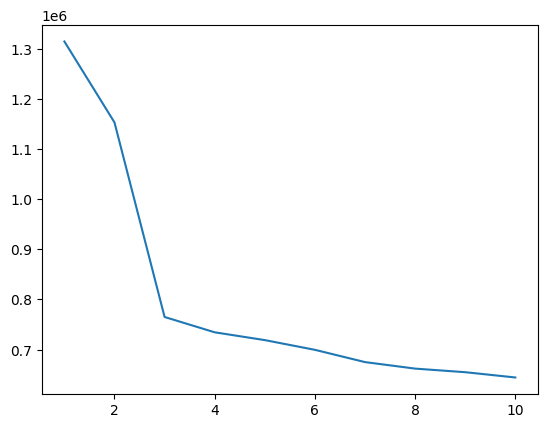

In [97]:
n_components = np.arange(1, 11, 1)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(X_pca).aic(X_pca) for model in models]
plt.plot(n_components, aics);

In [98]:
# Determine the number of components using AIC
lowest_aic = np.infty
best_gmm = None
aics = []
for n_components in range(1, 11):
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_pca)

    aics.append(gmm.aic(X_pca))
    if gmm.aic(X_pca) < lowest_aic:
        lowest_aic = gmm.aic(X_pca)
        print(lowest_aic)
        best_gmm = gmm

# Confirm convergence
if best_gmm.converged_:
    print("GMM has converged.")
else:
    print("GMM has not converged.")

1314744.3686799137
1153172.1019164212
765017.4318864205
757558.6883177313
698022.3150361862
693076.4060961673
679907.1068646496
670120.6804701618
636345.1307000039
GMM has converged.


In [99]:
print(n_components)

10


In [76]:
# Generate new samples
new_samples_pca = best_gmm.sample(n_samples=100)[0]

In [77]:
# Inverse transform the PCA to get original features
new_samples = pca.inverse_transform(new_samples_pca)

# Denormalize the data
new_samples_denormalized = scaler.inverse_transform(new_samples)

# Create a DataFrame for new samples
new_data = pd.DataFrame(new_samples_denormalized, columns=['longitude', 'latitude', 'pm25'])

In [78]:
new_data.head(2)

,longitude,latitude,pm25
0,-73.910301,40.814716,2.107039
1,-73.921116,40.817285,2.668607


In [ ]:




# Save or use the new data
new_data.to_csv("generated_data.csv", index=False)

# Print the generated data
print("Generated Data:")
print(new_data)


In [86]:

# Measure performance in terms of accuracy
# Calculate statistics for original and generated data
original_stats = data.describe()
generated_stats = new_data.describe()

In [ ]:
# Compare mean, standard deviation, and correlation between original and generated data
mean_diff = abs(original_stats.loc['mean'] - generated_stats.loc['mean'])
std_diff = abs(original_stats.loc['std'] - generated_stats.loc['std'])
correlation = data.corrwith(new_data)

# Print the performance metrics
print("Performance Metrics:")
print("Mean Difference:")
print(mean_diff)
print("Standard Deviation Difference:")
print(std_diff)
print("Correlation:")
print(correlation)

In [92]:
# Step 5: Calculate performance metrics (RMSE and MAPE)
# Assuming we have true values for comparison
true_values = data[['longitude', 'latitude', 'pm25']].values[:100]  # Assuming first 100 rows are true values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(true_values[:, 2], new_samples_denormalized[:, 2]))
# Calculate MAPE
mape = np.mean(np.abs((true_values[:, 2] - new_samples_denormalized[:, 2]) / true_values[:, 2])) * 100

print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 2.1097180160469646
MAPE: 31.46966792937015
